## Méthode du recuit simulé

In [1]:
import numpy as np
import numpy.random as npr
import math
import matplotlib.pyplot as plt

In [2]:
def potentiel(k,N): #fonction potentiel donnée
    return (4*k/N-2)**4-3*(4*k/N-2)**2+4*k/N-2

def recuit_sim(x0,N,it,h):
    X=[x0] #chaine de markov commençant à l'état x0
    etat=x0 
    for i in range(it):
        #calcul de l'état intermédiaire y_p
        U=npr.rand() #simulation d'une v.a uniforme
        if(U<=0.5):
            etat=(etat-1)%(N+1) #on utilise le modulo pour gérer le cas où l'état passe de l'état 0 à -1 pour qu'il revienne en N
        else :
            etat=(etat+1)%(N+1) #on utilise le modulo pour gérer le cas où l'état passe de l'état N à N+1 pour qu'il revienne en 0
        delta_V=potentiel(etat,N)-potentiel(X[i],N) #calcul de la variation de potentiel
        T=h/np.log(i+2)
        alpha=np.minimum(1,np.exp(-delta_V/T))
        U=npr.rand()
        if(U<=alpha):
            X.append(etat)
        else:
            etat=X[i] #on reste sur place
            X.append(etat)
    return X

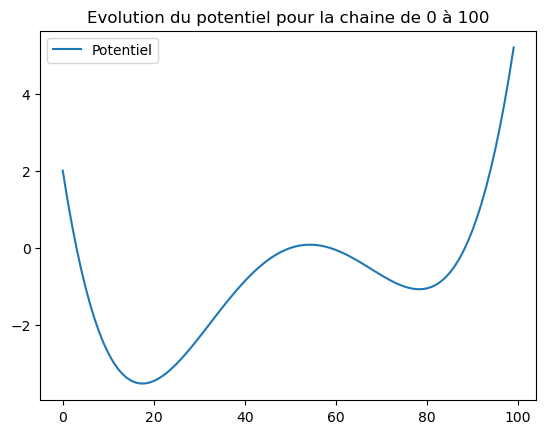

Text(0.5, 1.0, 'Evolution des états selon h')

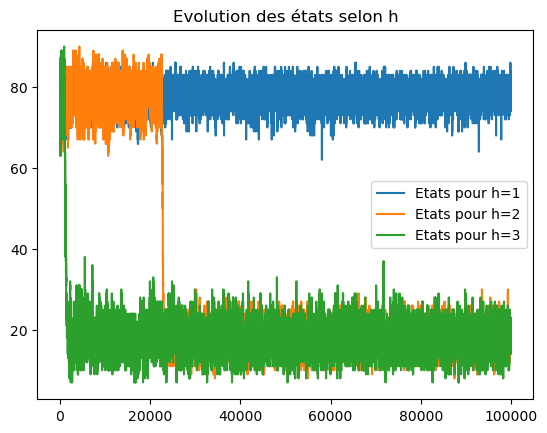

In [3]:
N=100 #nombre d'état allant de 0 à N
iteration=100000 #nombre d'itérations que l'on fait
R_S=recuit_sim(80,N,iteration,1)  #algo calculé en partant de 80
plt.plot([potentiel(i,100) for i in range(100)],label="Potentiel")
plt.legend(loc="best") #pour faire apparaitre la légende
plt.title("Evolution du potentiel pour la chaine de 0 à "+str(N))
plt.show() #permet de tracer un autre graphique après
plt.plot(R_S, label="Etats pour h=1")
plt.plot(recuit_sim(80,N,iteration,2),label="Etats pour h=2")
plt.plot(recuit_sim(80,N,iteration,3),label="Etats pour h=3")
plt.legend(loc="best")
plt.title("Evolution des états selon h")

In [3]:
import numpy as np
import random

def lire_bigram_freq(filename):
    """Lit les fréquences des bigrammes à partir d'un fichier."""
    bigram_freq = {}
    alphabet = " ABCDEFGHIJKLMNOPQRSTUVWXYZ"  # Inclut l'espace
    with open(filename, 'r') as f:
        lignes = f.readlines()
    
    # Pour chaque ligne, associer les bigrammes correspondants
    for i, ligne in enumerate(lignes):
        bigram_freq[alphabet[i]] = list(map(float, ligne.strip().split()[1:]))  # Ignore le caractère et prend les probabilités
    
    return bigram_freq

def calculer_probabilite(texte, bigram_freq):
    """Calcule la probabilité d'un texte en fonction des bigrammes."""
    prob = 1.0
    for i in range(len(texte) - 1):
        a = texte[i]
        b = texte[i + 1]
        prob *= bigram_freq[a][ord(b) - ord('A')]  # Convertir le caractère en index
    return prob

def decodage_recuit_simule(message, bigram_freq, iterations=10000, initial_temperature=10):
    """Décode le message en utilisant le recuit simulé."""
    alphabet = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
    meilleur_code = alphabet.copy()
    meilleur_prob = calculer_probabilite(message, bigram_freq)
    
    temperature = initial_temperature
    
    for i in range(iterations):
        # Générer une nouvelle solution par transposition de deux caractères
        nouveau_code = meilleur_code.copy()
        idx1, idx2 = random.sample(range(len(nouveau_code)), 2)
        nouveau_code[idx1], nouveau_code[idx2] = nouveau_code[idx2], nouveau_code[idx1]
        
        # Remplacer le message en utilisant la nouvelle clé
        nouvelle_message = ''.join(nouveau_code[ord(c) - ord('A')] for c in message)
        nouvelle_prob = calculer_probabilite(nouvelle_message, bigram_freq)

        # Acceptation du nouveau code
        delta_prob = nouvelle_prob - meilleur_prob
        if delta_prob > 0 or np.exp(delta_prob / temperature) > np.random.rand():
            meilleur_code = nouveau_code
            meilleur_prob = nouvelle_prob
        
        # Refroidissement
        temperature *= 0.99  # Diminuer la température
    
    # Retourner le meilleur code trouvé
    return ''.join(meilleur_code)

# Chargement des fréquences des bigrammes
bigram_freq = lire_bigram_freq('transitions_alphabets.txt')

# Message à décoder
message = "FRNBRJMFBRNQXHFYNWSRNKRDNZLXDRDNMOOHCRFYNZXJJRNYSNKRDNBRDHORDNJMHDNBRDHORNWSNRKKRDNMOOHCRFYNZXJJRNRKKRDNMOOHCRFYNRYNYSNQOXDQROROMDNYXSVXSODNRQHZYRYR"

# Décodage
message_dechiffre = decodage_recuit_simule(message, bigram_freq)

print("Message déchiffré :", message_dechiffre)


Message déchiffré : ZFMDLAETRYXQKOPJNGCHUIBVWS
